In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\hardi\\OneDrive - wipro\\Desktop\\datasets\\linkedin-reviews - linkedin-reviews.csv")

In [5]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


## Exploratory Data Analysis

we will start by analyzing of ratings. it will provide into the overall sentiment of the reviews. then we can explore furture, such as analyzing the length of reviews,and possibly derive insights frm the text of the reviews.

## Plotting the Distribution Ratings

<function matplotlib.pyplot.show(close=None, block=None)>

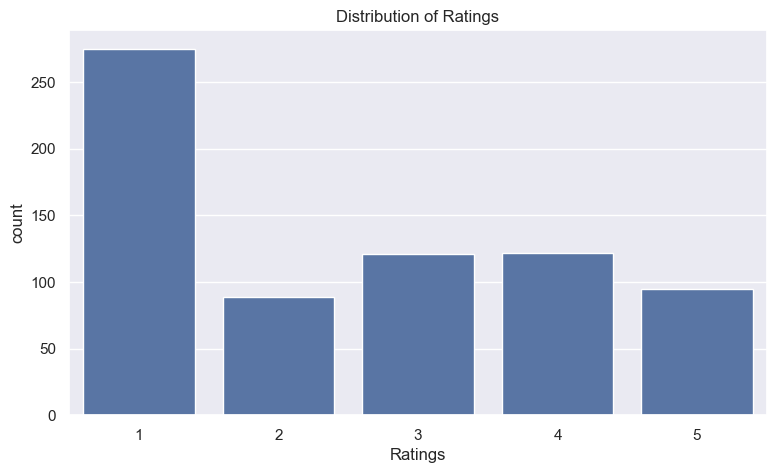

In [46]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (9,5))
sns.countplot(data= df, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('count')
plt.show

## Adding sentiment labels in the data

we will use textblob library. textblob provides a polarity scores ranging from -1(very negative) to 1(very positive) for a given text we can  use this score to classiy each reviews sentiment as positive , negative or neutral.

In [33]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   ------- -------------------------------- 112.6/624.3 kB 2.2 MB/s eta 0:00:01
   ----------------- ---------------------- 276.5/624.3 kB 2.8 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/624.3 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 30.7 MB/s eta 0:00:01
   ---------------------------- ----------- 1.1/1.5 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [35]:
from textblob import TextBlob

In [37]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'positive'
    elif sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'Neutral'
        

In [39]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [43]:
df.sample(5)

,Review,Rating,Sentiment
147,Application was not functional. will try to un...,1,Neutral
142,App doesnt remember login.,4,Neutral
371,"Great for keeping up, but doesn't replace pc",4,positive
575,Contacts Sync is a 5 star must-have!,5,Neutral
215,Can't change my profile in the app. No setting...,2,Neutral


## Analyzing app reviews sentiment

In [49]:
sentiment_distibution = df['Sentiment'].value_counts()
sentiment_distibution 

Sentiment
Neutral     300
positive    295
negative    107
Name: count, dtype: int64

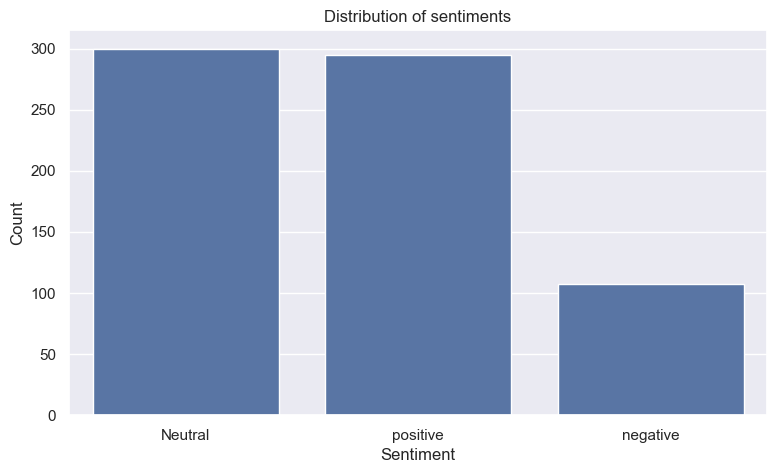

In [57]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distibution.index,
           y = sentiment_distibution.values)
plt.title('Distribution of sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## So , we can see although the app has low ratings , still the reviewers don't use many negative words in the reviews for the app.

Next, we’ll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and numerical ratings.

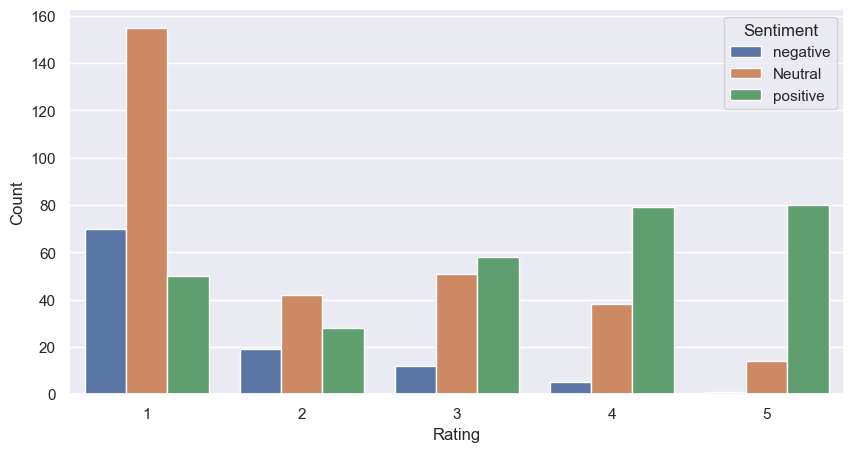

In [65]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
             x = 'Rating',hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()

## Summary

App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback, prioritize feature updates and maintain a positive user community. It involves using data analysis techniques to determine whether the sentiments in these reviews are positive, negative or neutral.